In [11]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

%matplotlib inline

In [12]:
def comma_to_float(valstr):
    return float(valstr.decode("utf-8"))

In [13]:
t,x,y = np.loadtxt("D:/Versuch 223/Dokumente/Messungen/Spartakusbund/position_data.txt", delimiter=",", dtype="float",
                   unpack=True)

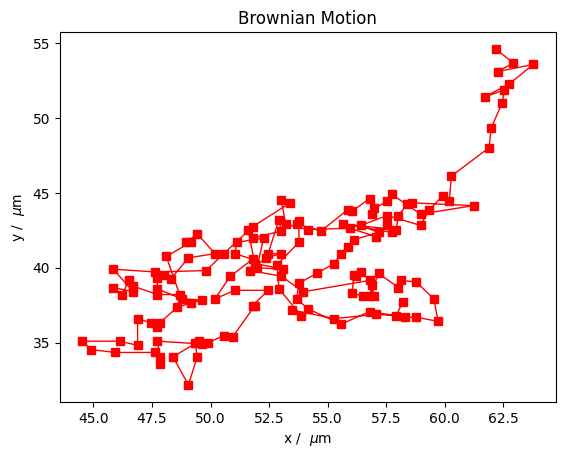

In [14]:
plt.plot(x, y, marker='s', color='red', linewidth=1)
plt.xlabel('x / '+' $\mu$'+'m')
plt.ylabel('y / '+' $\mu$'+'m')
plt.title('Brownian Motion')

plt.savefig('D:/Versuch 223/Dokumente/Messungen/Spartakusbund/Bild1.pdf', format='pdf')
plt.show()

In [15]:
dt=np.array([])
dx=np.array([])
dy=np.array([])
i=0
while i < len(t)-1:
    dt=np.append(dt,t[i+1]-t[i])
    dx=np.append(dx,x[i+1]-x[i])
    dy=np.append(dy,y[i+1]-y[i])
    i = i + 1
r_squared=dx**2+dy**2

In [16]:
r_squared_mean=np.mean(r_squared)
print("r_squared_mean= " ,r_squared_mean)
r_squared_mean_std=np.std(r_squared)/np.sqrt(len(r_squared))
print("r_squared_mean_std= " ,r_squared_mean_std)
dt_mean=np.mean(dt)
print("dt_mean= ", dt_mean)

r_squared_mean=  1.7125699375006713
r_squared_mean_std=  0.1345748492438295
dt_mean=  1.0


0.06996355704697986 0.9227080087631566


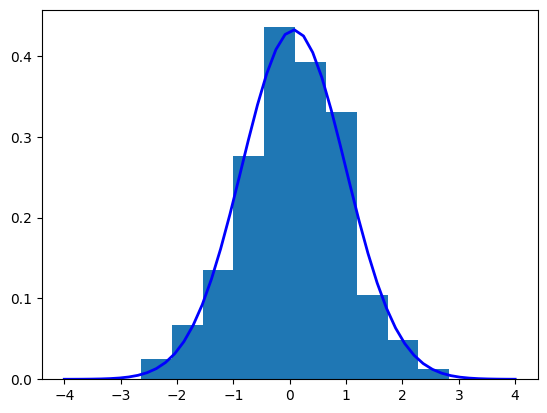

In [17]:
all_data=np.append(dx,dy)
plt.hist(all_data, density=True)

mu=np.mean(all_data)
sigma=np.std(all_data)
gauss = norm.pdf(np.linspace(-4,4), mu , sigma)

plt.plot(np.linspace(-4,4), gauss, 'b-', linewidth=2)
print(mu, sigma)

plt.savefig('D:/Versuch 223/Dokumente/Messungen/Spartakusbund/Bild2.pdf', format='pdf')
plt.show()

a: (1.65623592475538 +- 0.011255371321217783) b: (12.704985987551481 +- 0.9633703592163699)


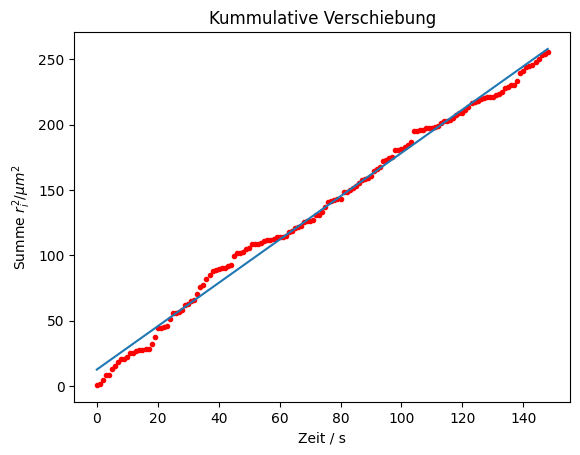

In [19]:
r_kumm=np.cumsum(r_squared)

def linear(x,a,b):
    
    return a*x+b

popt, pcov = curve_fit(linear, t[:-1], r_kumm)
print(f"a: ({popt[0]} +- {np.sqrt(pcov[0,0])})", f"b: ({popt[1]} +- {np.sqrt(pcov[1,1])})")
plt.plot(t[:-1], r_kumm, marker='.', color='red', linewidth=0)
plt.plot(t[:-1], linear(t[:-1],*popt))
plt.xlabel('Zeit / s')
plt.ylabel('Summe $r_i^2 /\mu m^2$')
plt.title('Kummulative Verschiebung')
plt.savefig('D:/Versuch 223/Dokumente/Messungen/Spartakusbund/Bild3.pdf', format='pdf')
plt.show()